### Supervised Learning Analysis: test vs train accuracy


#### High frequency high delta mods 
* After 30 rounds of supervised training using 500 reads of native yeast rRNA (NOP58_GAL). This notebook compares test vs train accuracy across the 30 rounds of training. Testing is a separate sample of native yeast rRNA sequenced on a different day on a different flowcell (CBF5_GAL)
* Note: Because the training was performed on native yeast rRNA and calls are only attempted on modified locations, the recall or true positive rate is going to be our metric for this analysis. 


In [1]:
from multiple_model_accuracy import MultipleModelAccuracy
import numpy as np


mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
mma = MultipleModelAccuracy(reference, positions, mods_csv)



In [2]:
from py3helpers.utils import list_dir
training_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_accuracy_csvs"
testing_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
training_csvs = [mma.preprocess_accuracy_csv(x) for x in list_dir(training_path, "csv")]
testing_csvs = [mma.preprocess_accuracy_csv(x) for x in list_dir(testing_path, "csv")]

In [3]:
deltas = [training_csvs[i].recall - testing_csvs[i].recall  for i in range(len(training_csvs))]

<IPython.core.display.Javascript object>


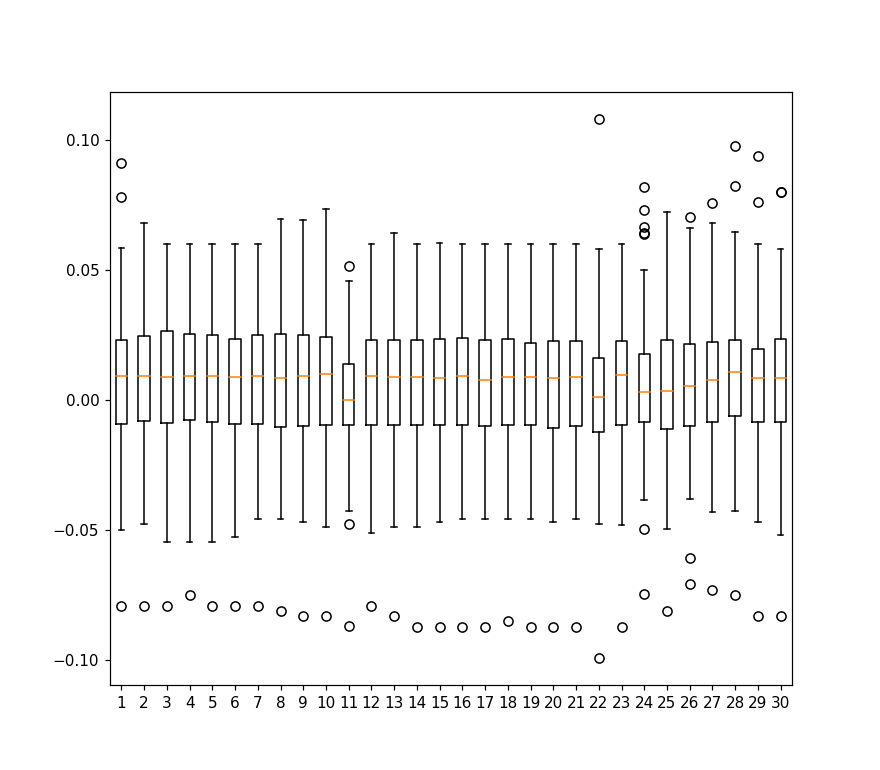

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt 
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [5]:
training_csvs[0]["testing_diff"] = training_csvs[0].recall - testing_csvs[0].recall
training_csvs[0]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,...,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,testing_diff
0,RDN18-1,27,+,Aa,0.9080,1.0,0.0,0.9080,NaN,NaN,...,1.0,0.8803,72.0,NaN,72.0,False,False,False,95,0.0259
1,RDN18-1,99,+,Aa,0.8119,1.0,0.0,0.8119,NaN,NaN,...,1.0,0.7732,6.0,72.0,6.0,False,False,False,80,0.0009
2,RDN18-1,105,+,Tl,0.9018,1.0,0.0,0.9018,NaN,NaN,...,1.0,0.8633,14.0,6.0,6.0,False,False,False,95,0.0136
3,RDN18-1,119,+,Tl,0.8507,1.0,0.0,0.8507,NaN,NaN,...,1.0,0.7872,91.0,14.0,14.0,False,False,False,95,0.0519
4,RDN18-1,210,+,Tl,0.8384,1.0,0.0,0.8384,NaN,NaN,...,1.0,0.7963,91.0,91.0,91.0,False,False,False,83,0.0579
5,RDN18-1,301,+,Tl,0.7689,1.0,0.0,0.7689,NaN,NaN,...,1.0,0.7042,112.0,91.0,91.0,False,False,False,86,0.0169
6,RDN18-1,413,+,Cb,0.8484,1.0,0.0,0.8484,NaN,NaN,...,1.0,0.8070,6.0,112.0,6.0,False,False,False,95,-0.0312
7,RDN18-1,419,+,Aa,0.6086,1.0,0.0,0.6086,NaN,NaN,...,1.0,0.5008,16.0,6.0,6.0,False,False,False,95,-0.0792
8,RDN18-1,435,+,Aa,0.8460,1.0,0.0,0.8460,NaN,NaN,...,1.0,0.8063,30.0,16.0,16.0,False,False,False,73,0.0093
9,RDN18-1,465,+,Tl,0.7864,1.0,0.0,0.7864,NaN,NaN,...,1.0,0.7071,75.0,30.0,30.0,False,False,False,60,0.0191


<IPython.core.display.Javascript object>


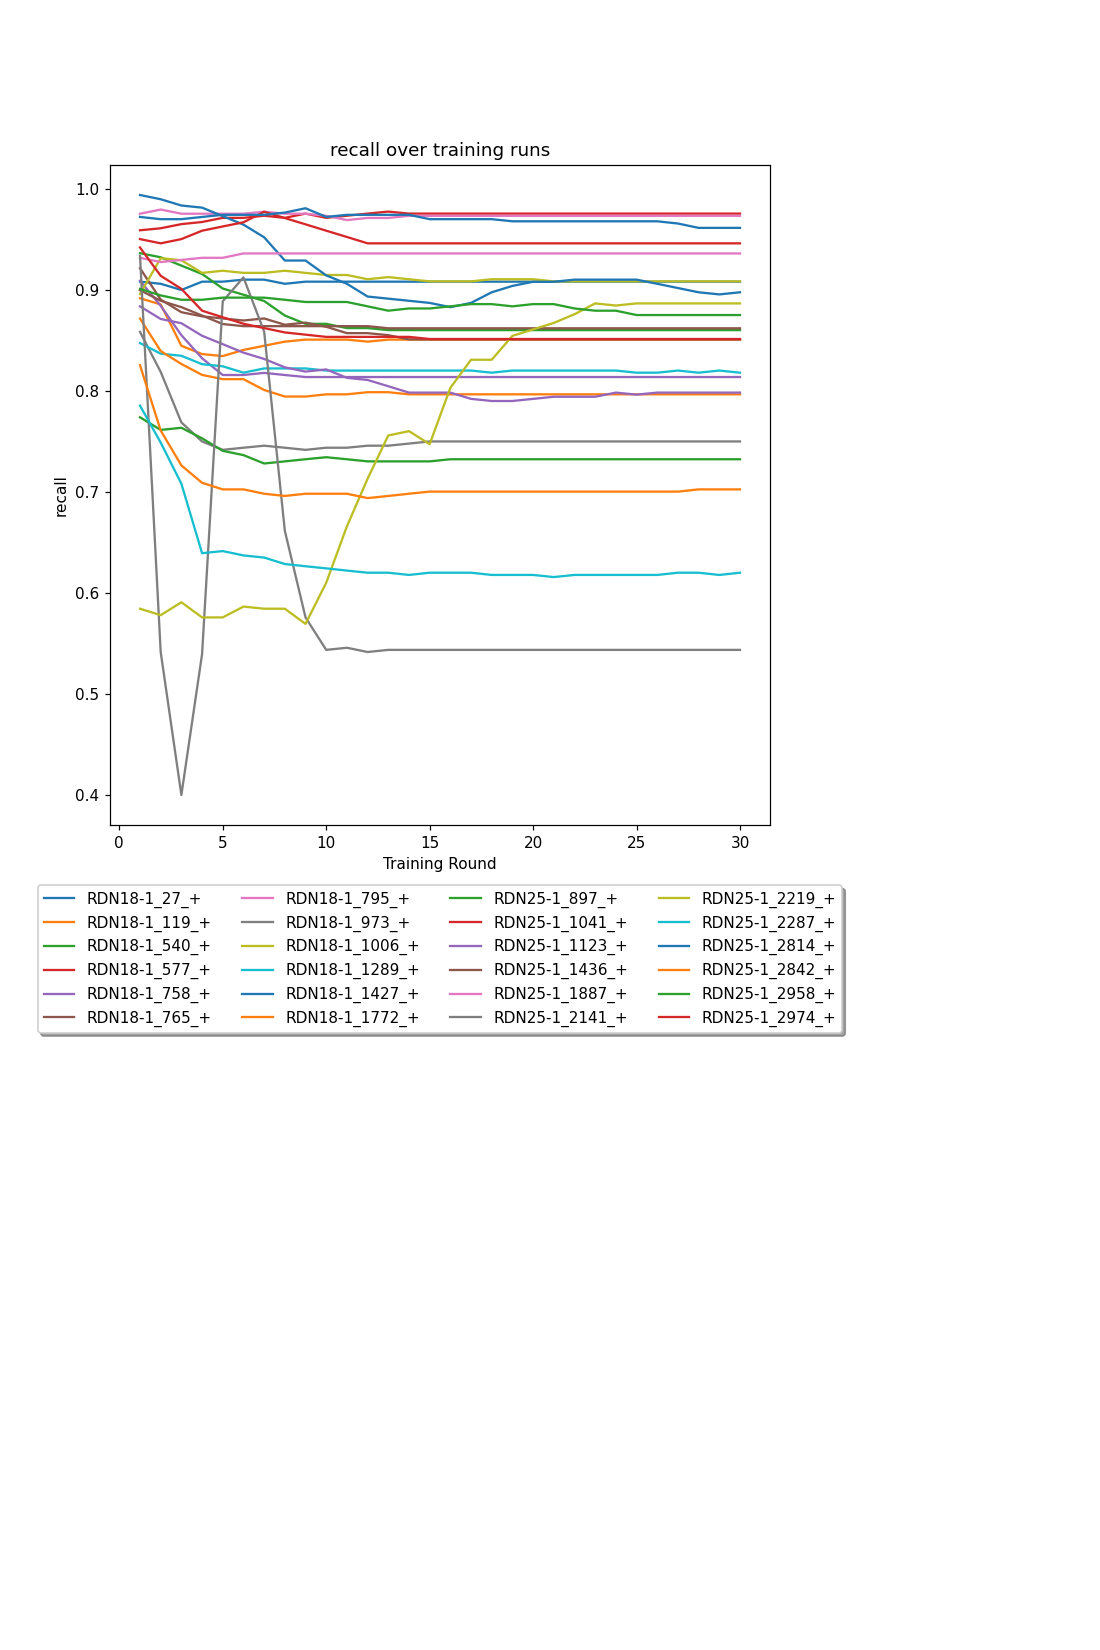

In [6]:
%matplotlib notebook

# Training Recall
key="recall"
dir_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_accuracy_csvs"
model_dir = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models"
model_n = 30
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, max_delta=False, avd=False)  


<IPython.core.display.Javascript object>


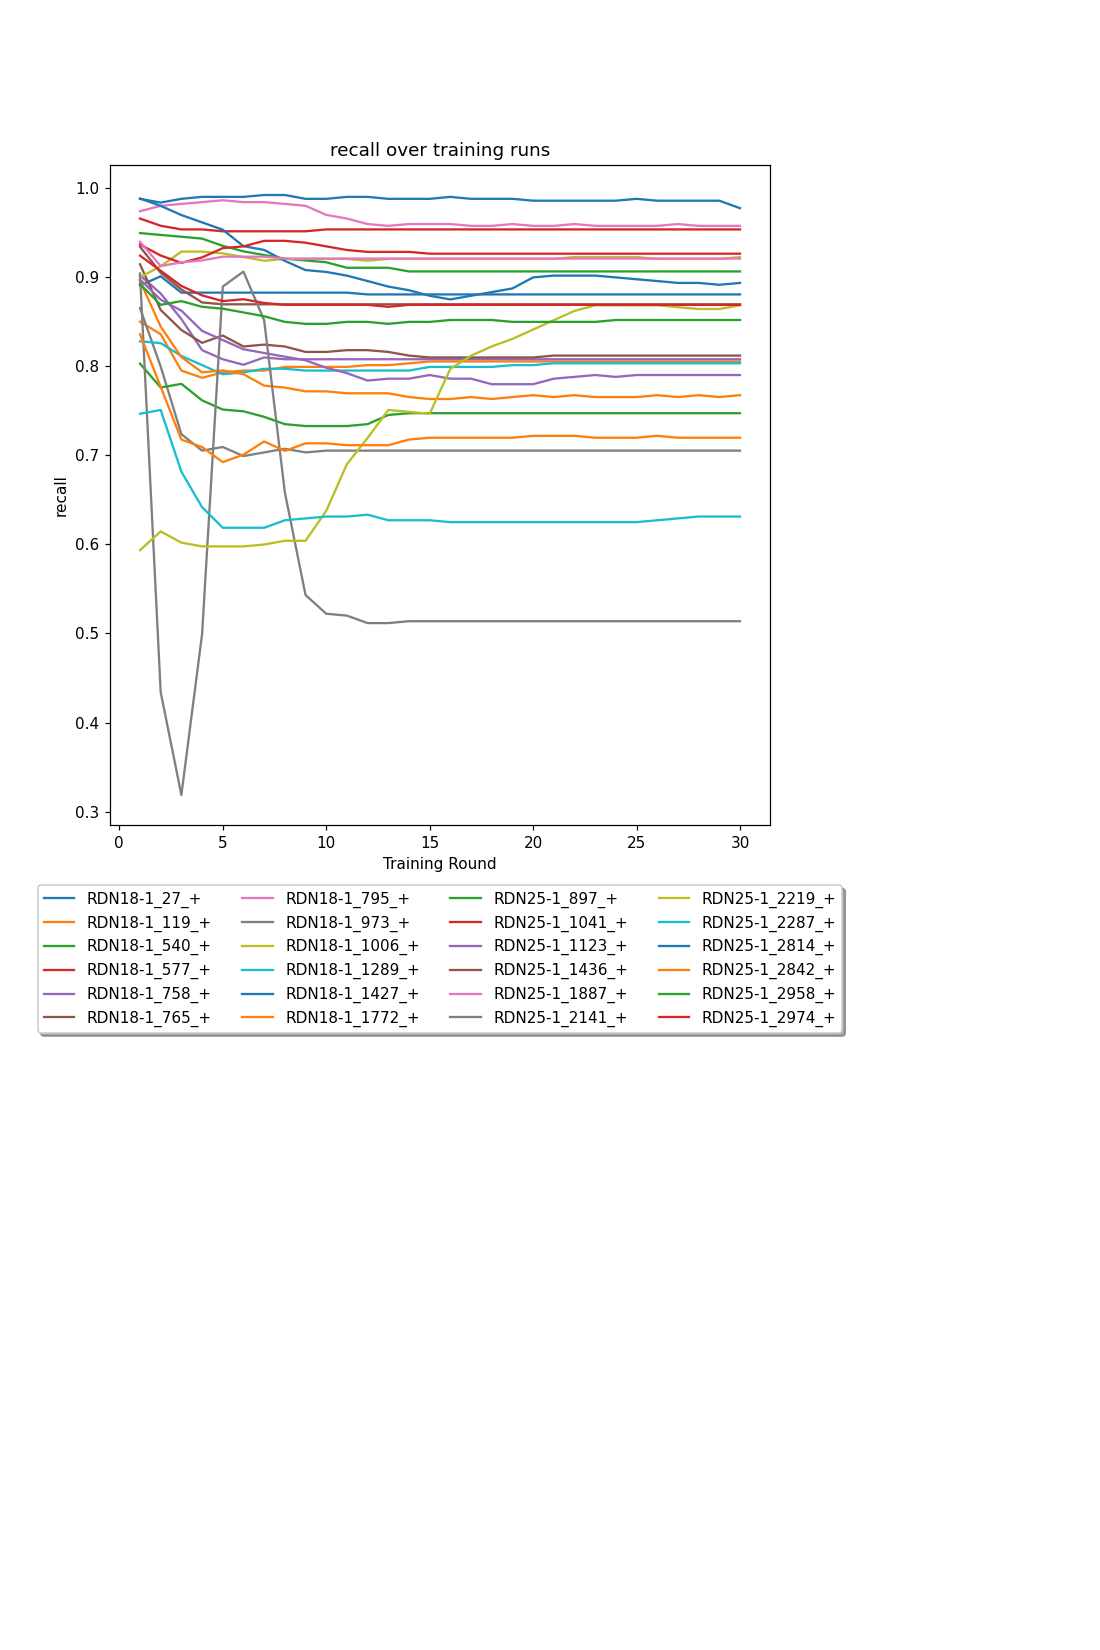

In [7]:
%matplotlib notebook

# Testing Recall
key="recall"
dir_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
model_dir = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models"
model_n = 30
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, avd=False)  
